In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random as rnd
from random import uniform as uniform
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
import zipfile
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Kaggle/'

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Kaggle/

!kaggle datasets download -d cactus3/basicshapes --force

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Kaggle/basicshapes.zip', 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

!ls '/tmp/shapes'

/content/drive/MyDrive/Kaggle
100% 402k/402k [00:00<00:00, 1.26MB/s]
100% 402k/402k [00:00<00:00, 1.25MB/s]
circles  shapes  squares  triangles


In [5]:
from PIL import Image
path = '/tmp/shapes'
first_path = path + '/triangles'
second_path = path + '/squares'
pathes = [first_path, second_path]

y_values = [[1], [0]]

x = []
y = []

size = (8,8)

max_count = 100

for i in range(len(pathes)):
  count = 0
  files = os.listdir(pathes[i])
  np.random.shuffle(files)
  for j in files:
    im = Image.open(pathes[i] + '/' + j)
    im = im.resize(size, Image.ANTIALIAS).convert('L')
    im = np.asarray(im) / 250
    count += 1

    x.append(im)
    y.append(y_values[i])

    if count == max_count:
      break

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

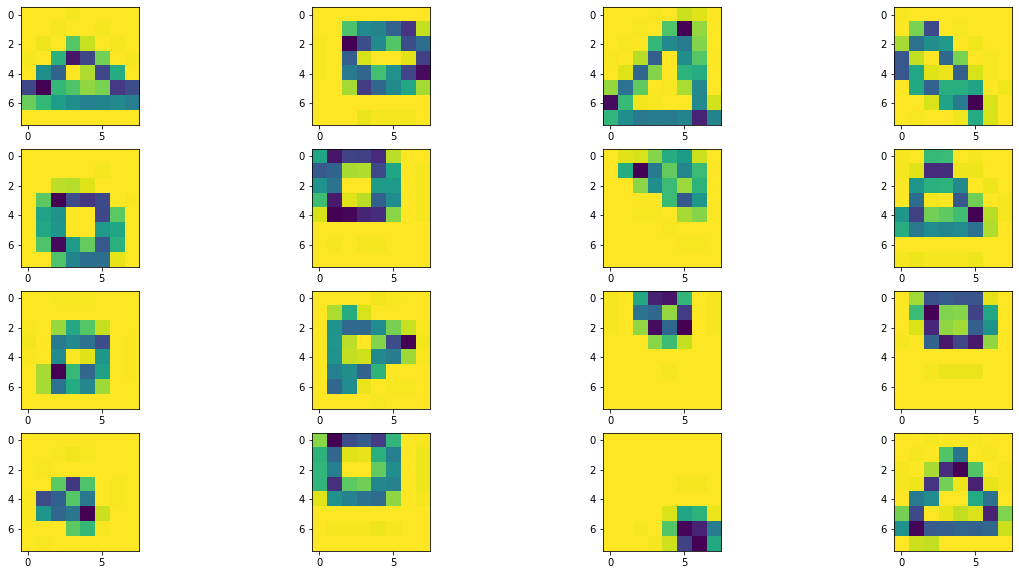

In [7]:
rows = 4
cols = 4

plt.figure(figsize = (20, 10))
for i in range(rows):
  for j in range(cols):
    plt.subplot(rows, cols, j + rows * i + 1)
    plt.imshow(x_train[j + rows * i])

In [8]:
def get_reshaped(arr):
  for i in range(len(arr)):
    arr[i] = arr[i].reshape([-1])
    arr[i] = np.append(arr[i], 1)
  return arr

In [11]:
from sklearn import svm

In [12]:
max_count = 100
x_svm = []
y_svm = []

for i in range(len(pathes)):
  count = 0
  files = os.listdir(pathes[i])
  np.random.shuffle(files)
  for j in files:
    im = Image.open(pathes[i] + '/' + j)
    im = im.resize((15, 15), Image.ANTIALIAS).convert('L')
    im = np.asarray(im) / 250
    count += 1

    x_svm.append(im)
    y_svm.append(y_values[i])

    if count == max_count:
      break

In [13]:
x_svm = get_reshaped(x_svm)

In [14]:
x_svm_train, x_svm_test, y_svm_train, y_svm_test = train_test_split(x_svm, y_svm, train_size=0.8)

In [15]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

models = {}

for k in kernels:
  models.setdefault(k, svm.SVC(kernel=k))

In [16]:
y_svm_train = np.array(y_svm_train)

In [17]:
for k in kernels:
  models[k].fit(x_svm_train, y_svm_train.ravel())
  prs = models[k].predict(x_svm_test)
  mse = np.square(prs - y_svm_test).mean()
  print(f'mse of svc with {k} = {mse}')

mse of svc with linear = 0.49
mse of svc with poly = 0.5
mse of svc with rbf = 0.51
mse of svc with sigmoid = 0.6
